In [1]:
using GraphViz

using StockFlow
using StockFlow.Syntax

using Catlab
using Catlab.CategoricalAlgebra
using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab.Graphics
using Catlab.Programs
using Catlab.Theories
using Catlab.WiringDiagrams

This model is re-created based on Garnett's paper:
https://journals.lww.com/stdjournal/Fulltext/2000/11000/Epidemiology_and_Control_of_Curable_Sexually.7.aspx

# 1. Define the components of all the sub-models
## 1.1 The births and deaths of Stock X

In [2]:
openX = Open( 
    (@stock_and_flow begin

        :stocks
        X

        :parameters
        μ

        :flows
        CLOUD => f_births(N * μ) => X
        X => f_deathX(X * μ) => CLOUD

        :sums
        N = [X]

        end 
    ),
    # feet
    foot(:X,:N,:X=>:N)
    
)

StructuredMulticospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{StockAndFlow0, StockAndFlowF}, SMulticospan{1, StockAndFlowF, StructTightACSetTransformation{TypeLevelBasicSchema{Symbol, Tuple{:S, :SV, :LS, :F, :I, :O, :V, :LV, :LSV, :P, :LVV, :LPV}, Tuple{(:lss, :LS, :S), (:lssv, :LS, :SV), (:ifn, :I, :F), (:is, :I, :S), (:ofn, :O, :F), (:os, :O, :S), (:fv, :F, :V), (:lvs, :LV, :S), (:lvv, :LV, :V), (:lsvsv, :LSV, :SV), (:lsvv, :LSV, :V), (:lvsrc, :LVV, :V), (:lvtgt, :LVV, :V), (:lpvp, :LPV, :P), (:lpvv, :LPV, :V)}, Tuple{:Name, :Op, :Position}, Tuple{(:sname, :S, :Name), (:svname, :SV, :Name), (:fname, :F, :Name), (:vname, :V, :Name), (:pname, :P, :Name), (:vop, :V, :Op), (:lvsposition, :LV, :Position), (:lsvsvposition, :LSV, :Position), (:lvsrcposition, :LVV, :Position), (:lpvpposition, :LPV, :Position)}}, NamedTuple{(:S, :SV, :LS, :F, :I, :O, :V, :LV, :LSV, :P, :LVV, :LPV), Tuple{Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.Cate

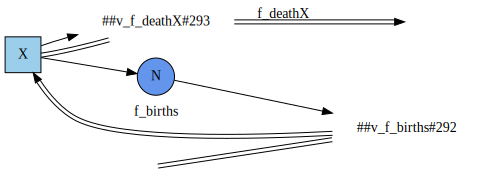

In [3]:
Graph(apex(openX))

## 1.2 The SIS sub-model structure

In [4]:
openSIS_A = Open(
    (@stock_and_flow begin

        :stocks
        X
        A

        :parameters
        μ
        ϕ_complement
        σ′
        cβ

        :flows
        X => f_newInfectiousA(ϕ_complement * X * cβ * NI / N) => A
        A => f_deathA(A * μ) => CLOUD
        A => f_recoveryA(A * σ′) => X

        :sums
        N = [X, A]
        NI = [A]

    end
    ),
     # feet
     foot(:X,:N,:X=>:N),
     foot((),:NI,())

)

StructuredCospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{StockAndFlow0, StockAndFlowF}, Multicospan{StockAndFlowF, StructTightACSetTransformation{TypeLevelBasicSchema{Symbol, Tuple{:S, :SV, :LS, :F, :I, :O, :V, :LV, :LSV, :P, :LVV, :LPV}, Tuple{(:lss, :LS, :S), (:lssv, :LS, :SV), (:ifn, :I, :F), (:is, :I, :S), (:ofn, :O, :F), (:os, :O, :S), (:fv, :F, :V), (:lvs, :LV, :S), (:lvv, :LV, :V), (:lsvsv, :LSV, :SV), (:lsvv, :LSV, :V), (:lvsrc, :LVV, :V), (:lvtgt, :LVV, :V), (:lpvp, :LPV, :P), (:lpvv, :LPV, :V)}, Tuple{:Name, :Op, :Position}, Tuple{(:sname, :S, :Name), (:svname, :SV, :Name), (:fname, :F, :Name), (:vname, :V, :Name), (:pname, :P, :Name), (:vop, :V, :Op), (:lvsposition, :LV, :Position), (:lsvsvposition, :LSV, :Position), (:lvsrcposition, :LVV, :Position), (:lpvpposition, :LPV, :Position)}}, NamedTuple{(:S, :SV, :LS, :F, :I, :O, :V, :LV, :LSV, :P, :LVV, :LPV), Tuple{Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAl

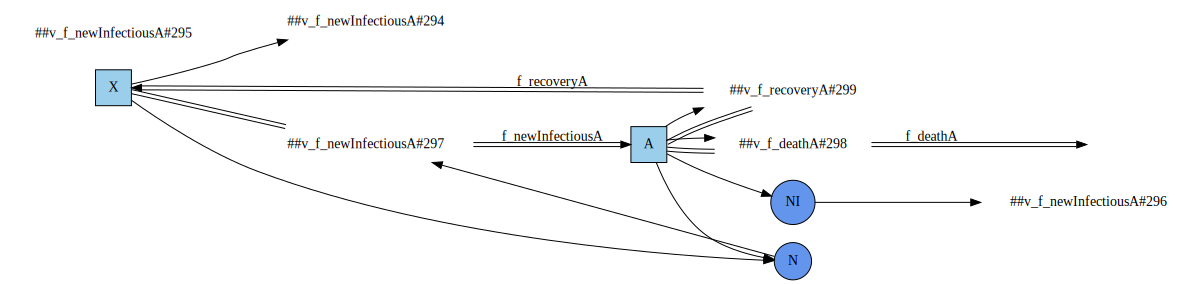

In [5]:
Graph(apex(openSIS_A))

In [6]:
openSIS_Y = Open(
    (@stock_and_flow begin
    
    :stocks
    X
    Y

    :parameters
    μ
    ϕ
    σ
    cβ

    :flows
    X => f_newInfectiousY(ϕ * X * cβ * NI / N) => Y
    Y => f_deathY(Y * μ) => CLOUD
    Y => f_recoveryY(Y * σ) => X

    :sums
    N = [X, Y]
    NI = [Y]

end
        ),

     # feet
     foot(:X,:N,:X=>:N),
     foot((),:NI,())
    
)

StructuredCospan{Catlab.CategoricalAlgebra.StructuredCospans.DiscreteACSet{StockAndFlow0, StockAndFlowF}, Multicospan{StockAndFlowF, StructTightACSetTransformation{TypeLevelBasicSchema{Symbol, Tuple{:S, :SV, :LS, :F, :I, :O, :V, :LV, :LSV, :P, :LVV, :LPV}, Tuple{(:lss, :LS, :S), (:lssv, :LS, :SV), (:ifn, :I, :F), (:is, :I, :S), (:ofn, :O, :F), (:os, :O, :S), (:fv, :F, :V), (:lvs, :LV, :S), (:lvv, :LV, :V), (:lsvsv, :LSV, :SV), (:lsvv, :LSV, :V), (:lvsrc, :LVV, :V), (:lvtgt, :LVV, :V), (:lpvp, :LPV, :P), (:lpvv, :LPV, :V)}, Tuple{:Name, :Op, :Position}, Tuple{(:sname, :S, :Name), (:svname, :SV, :Name), (:fname, :F, :Name), (:vname, :V, :Name), (:pname, :P, :Name), (:vop, :V, :Op), (:lvsposition, :LV, :Position), (:lsvsvposition, :LSV, :Position), (:lvsrcposition, :LVV, :Position), (:lpvpposition, :LPV, :Position)}}, NamedTuple{(:S, :SV, :LS, :F, :I, :O, :V, :LV, :LSV, :P, :LVV, :LPV), Tuple{Catlab.CategoricalAlgebra.FinSets.FinDomFunctionVector{Int64, Vector{Int64}, Catlab.CategoricalAl

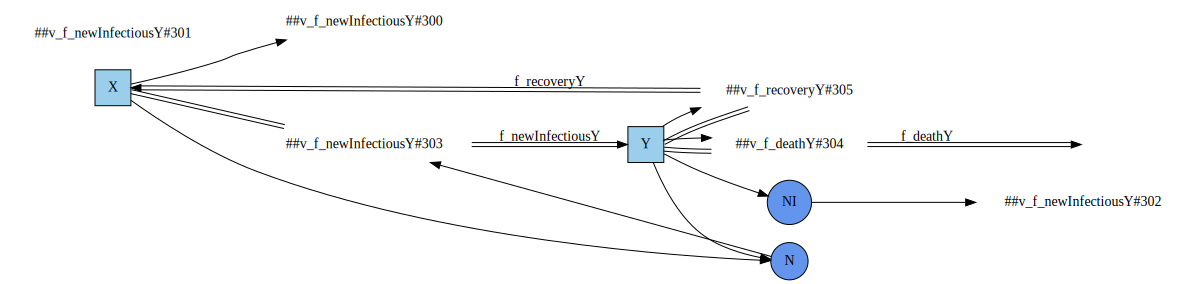

In [7]:
Graph(apex(openSIS_Y))

# 2 Compose
## 2.1 Define composition rule

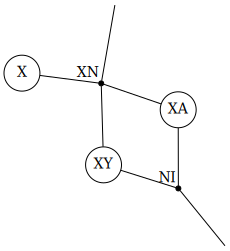

In [8]:
# define the UWD-algebra
uwd = @relation (XN,NI) begin
    X(XN)
    XA(XN,NI)
    XY(XN,NI)
end;
display_uwd(uwd)

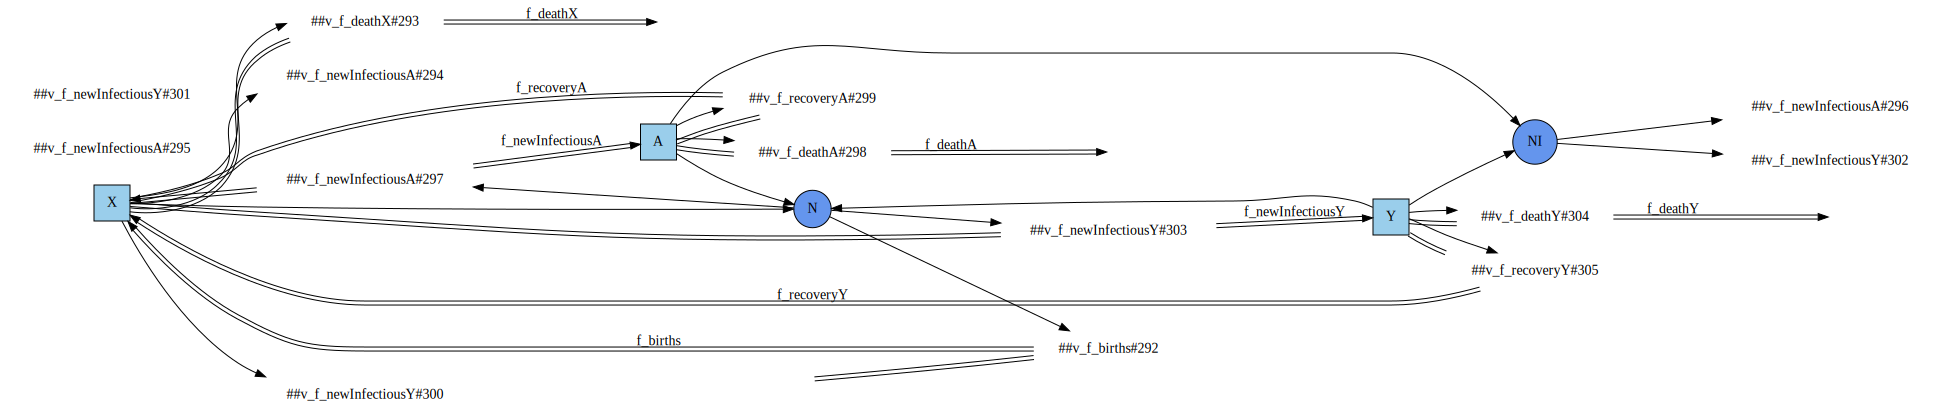

In [9]:
XAY_model = oapply(uwd,Dict(
    :X=>openX,
    :XA=>openSIS_A,
    :XY=>openSIS_Y
    )) |> apex
Graph(XAY_model)

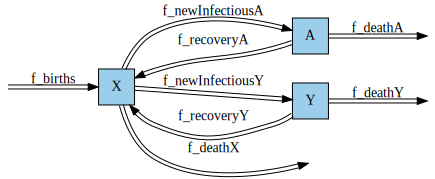

In [10]:
Graph(XAY_model,type="SF")

# 3. Solve ODEs

In [11]:
# define values of constant parameters
# unit: year
p = LVector(
    cβ=15*0.7, μ=1/15,ϕ=(0.95+0.4)/2,σ=12/4,σ′=12/4,ϕ_complement=(1.0 - ((0.95+0.4)/2))
)
# define initial values for stocks
u0 = LVector(
    X=990, A=5, Y=5
)

3-element LArray{Int64, 1, Vector{Int64}, (:X, :A, :Y)}:
 :X => 990
 :A => 5
 :Y => 5

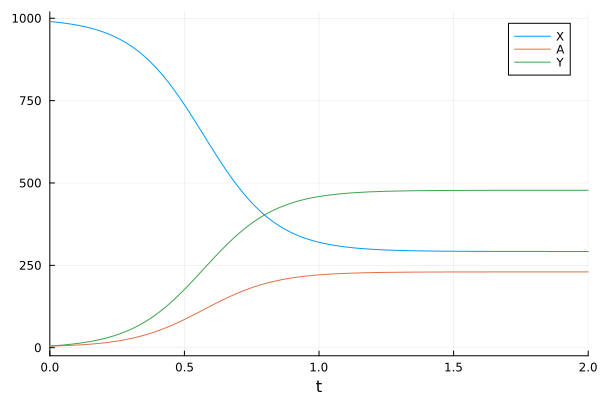

In [12]:
# results are tested the same as the Anylogic model
prob_XAY = ODEProblem(vectorfield(XAY_model),u0,(0.0,2.0),p);
sol = solve(prob_XAY,Tsit5(),abstol=1e-8);
plot(sol)

In [13]:
# to have the figures plotted fix to the wider of the cells
HTML("""
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>
""")


HTML{String}("<style>\n.output_svg div{\n  width: 100% !important;\n  height: 100% !important;\n}\n</style>\n")